# Actividad 4: Árbol de decisión

Johan Ronaldo Padilla Castañeda -
2109556

Adamary Luna Yepez -
2006566

Inteligencia Artificial y Redes Neuronales -
N1

Grupo: 007


---

### Objetivo:

Entrenar un árbol de decisión, modelo de aprendizaje supervisado.

---




1. Cargar Librerías

In [1]:
import zipfile
!pip install kaggle
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

2. Cargar de Datos

In [2]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
zip_file_path = '/content/breast-cancer-wisconsin-data.zip'

extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extracted_folder_path)

3. Preprocesamiento de Datos

In [4]:
datos = []

df_1 = pd.read_csv('/content/Dataset/data.csv')

datos = df_1.iloc[:, 2:32].values.tolist()

In [5]:
print(datos)

[[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189], [20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667, 0.5435, 0.7339, 3.398, 74.08, 0.005225, 0.01308, 0.0186, 0.0134, 0.01389, 0.003532, 24.99, 23.41, 158.8, 1956.0, 0.1238, 0.1866, 0.2416, 0.186, 0.275, 0.08902], [19.69, 21.25, 130.0, 1203.0, 0.1096, 0.1599, 0.1974, 0.1279, 0.2069, 0.05999, 0.7456, 0.7869, 4.585, 94.03, 0.00615, 0.04006, 0.03832, 0.02058, 0.0225, 0.004571, 23.57, 25.53, 152.5, 1709.0, 0.1444, 0.4245, 0.4504, 0.243, 0.3613, 0.08758], [11.42, 20.38, 77.58, 386.1, 0.1425, 0.2839, 0.2414, 0.1052, 0.2597, 0.09744, 0.4956, 1.156, 3.445, 27.23, 0.00911, 0.07458, 0.05661, 0.01867, 0.05963, 0.009208, 14.91, 26.5, 98.87, 567.7, 0.2098, 0.8663, 0.6869, 0.2575, 0.6638, 0.173], [20.29, 14.34, 135.1, 1297.0, 0.1003

In [6]:
labels = []

df_1 = pd.read_csv('/content/Dataset/data.csv')

labels = df_1.iloc[:, 1].values.tolist()

In [7]:
print(labels)

['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M',

In [8]:
data_train, data_test, label_train, label_test = train_test_split(datos, labels, test_size=0.2, random_state=42)

4. Selección y entrenamiento del Modelo

In [9]:
clf = DecisionTreeClassifier()

In [10]:
clf.fit(data_train, label_train)

DecisionTreeClassifier()

In [11]:
train_accuracy = clf.score(data_train, label_train)
print(train_accuracy)

1.0


5. Pruebas de modelo

In [12]:
prediction = clf.predict(data_test)

In [13]:
data = {'No.': list(range(1, 6)),
        'Predicción': prediction[:5],
        'Valor real': label_test[:5]}

df_2 = pd.DataFrame(data)

In [14]:
print(df_2)

   No. Predicción Valor real
0    1          B          B
1    2          M          M
2    3          M          M
3    4          B          B
4    5          B          B


In [15]:
accuracy = accuracy_score(label_test, prediction)
print("Accuracy: ", accuracy)
print("Reporte de clasificación: \n", classification_report(label_test, prediction, ))

Accuracy:  0.9210526315789473
Reporte de clasificación: 
               precision    recall  f1-score   support

           B       0.94      0.93      0.94        71
           M       0.89      0.91      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



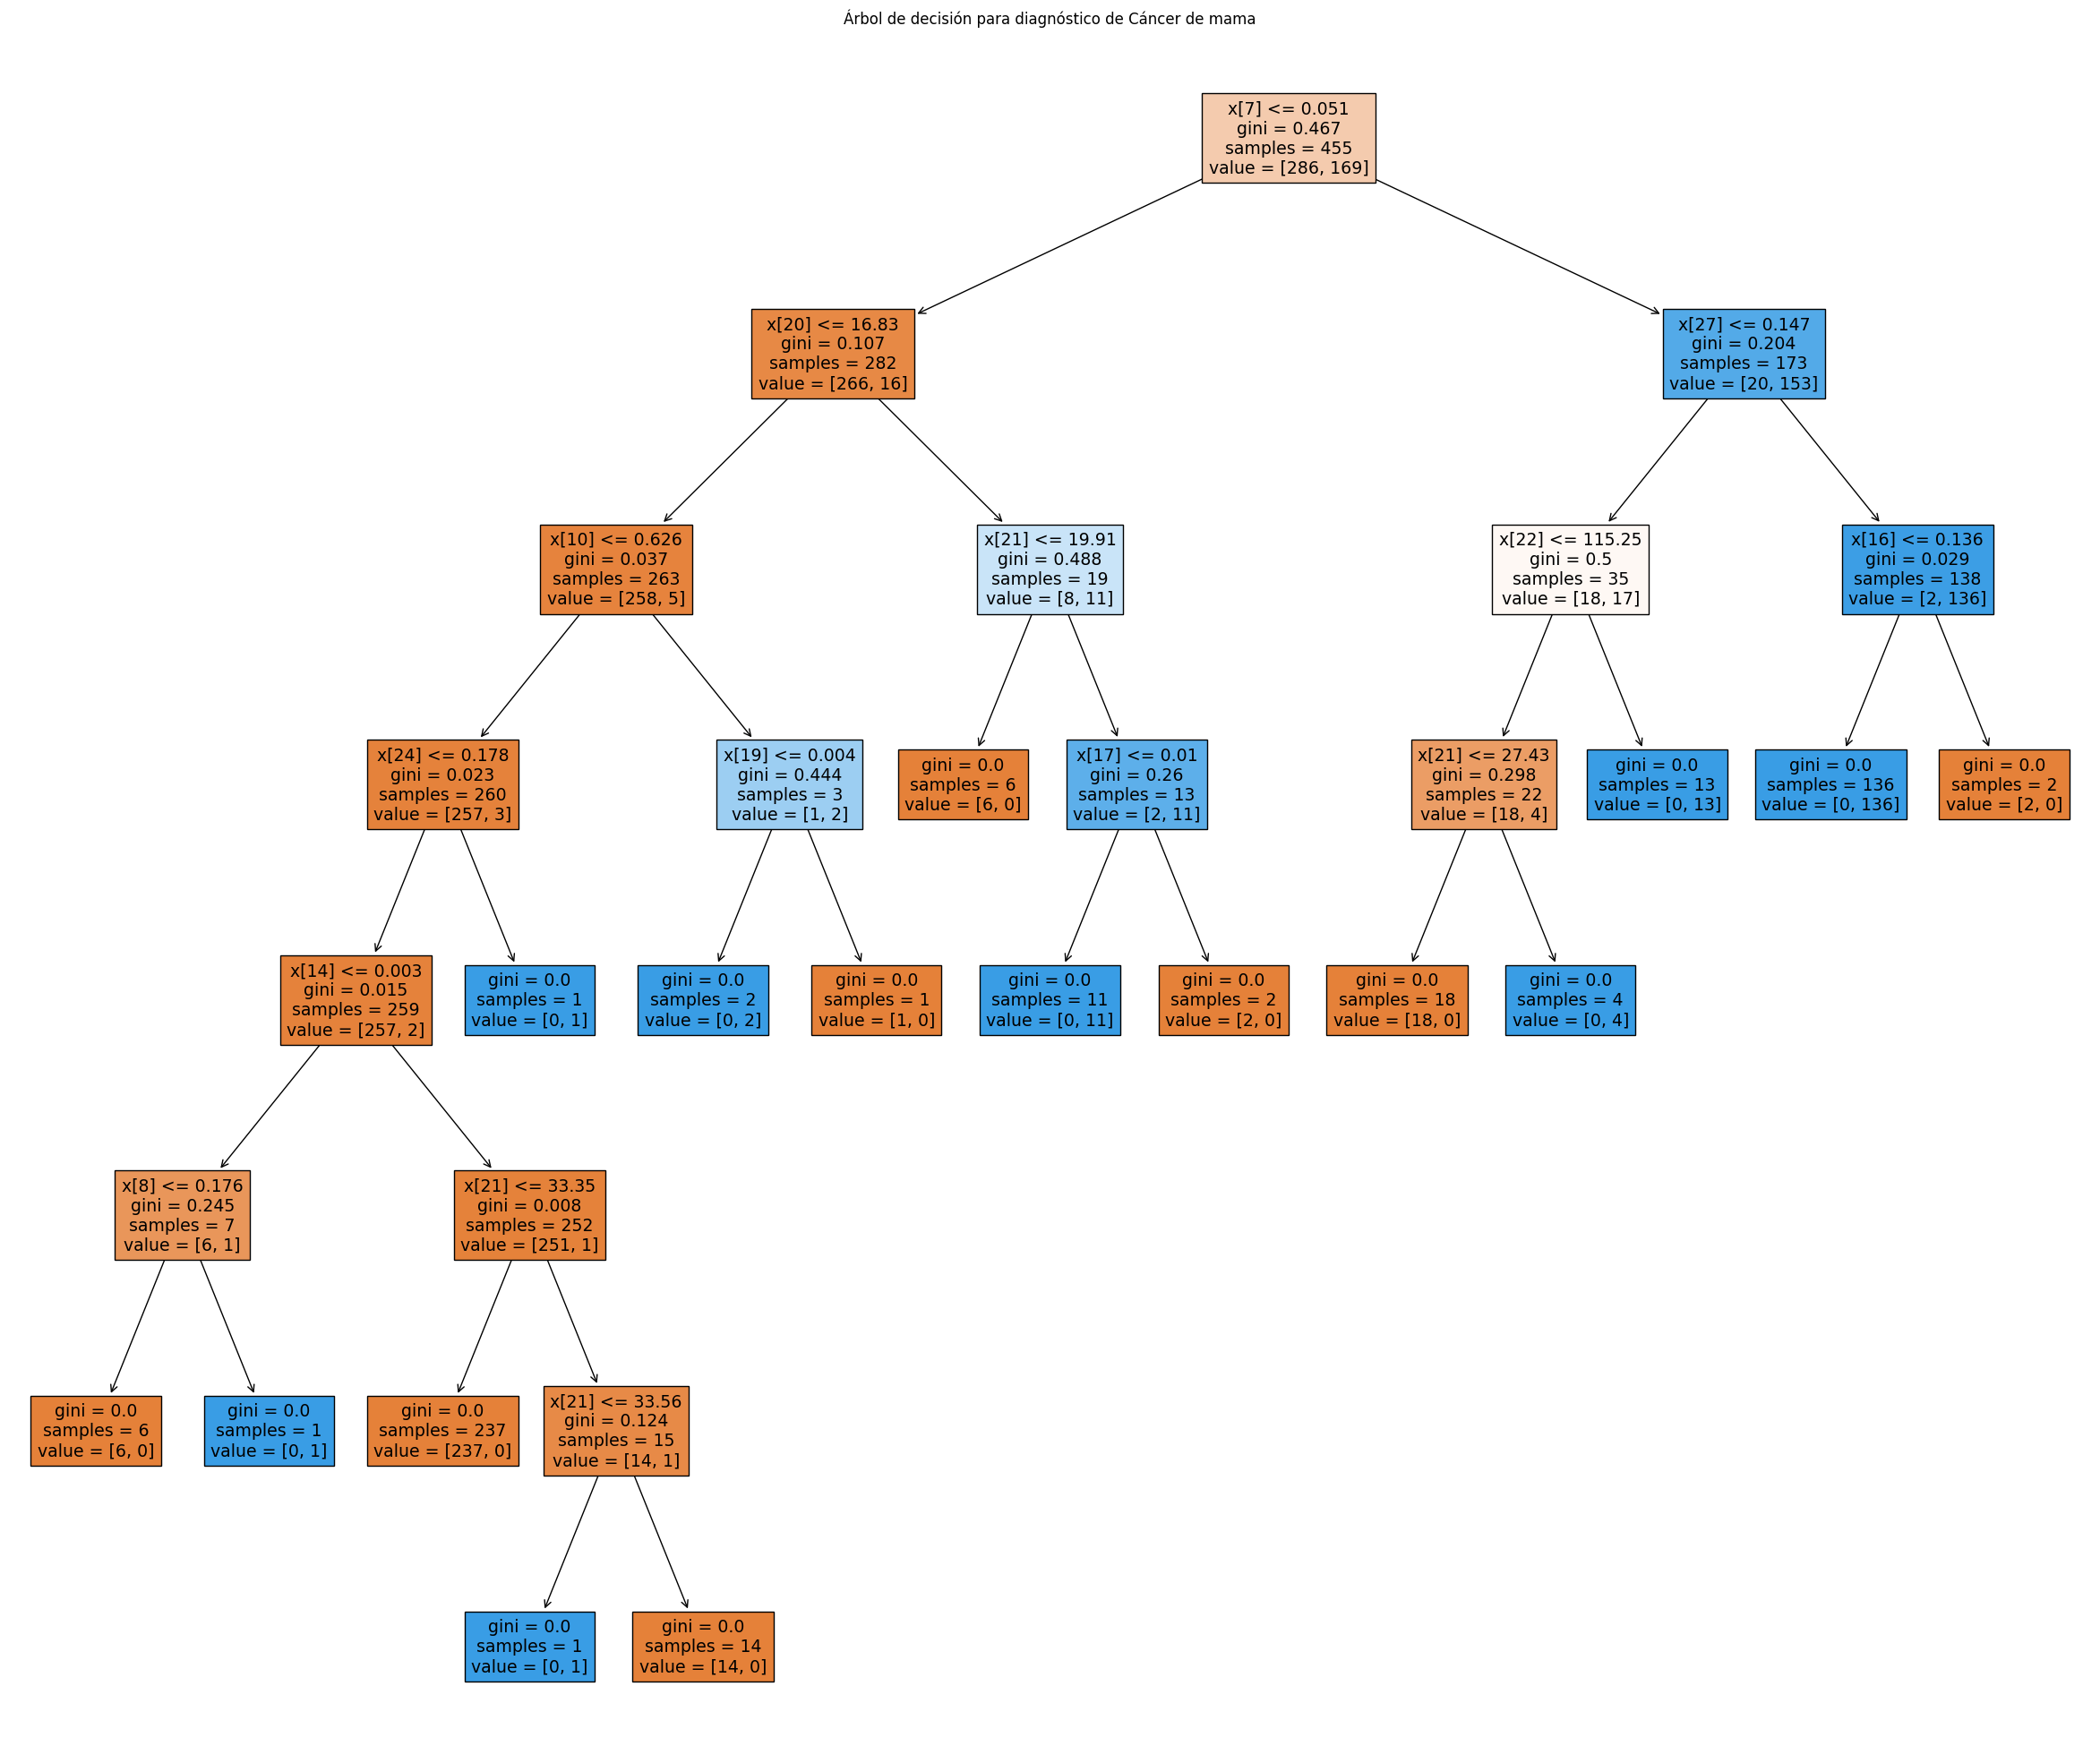

In [16]:
#Visualización del Árbol de decisión

plt.figure(figsize=(30, 25))
tree.plot_tree(clf, filled=True)
plt.title("Árbol de decisión para diagnóstico de Cáncer de mama")
plt.savefig("decision_tree.png", dpi=300)
plt.show()